In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

In [4]:
!head ../processed_data/wall_times_L12N12_U3.3.dat

# Wall times to collect 1 million samples for a 1D Bose-Hubbard lattice of size L=N=12 at U/t=3.3 & beta=16 in pigsfli
# Uniform sampling (seconds)     Truncated Exponential sampling (seconds)
5723.7     5747.37
5660.19    5760.47
5740.56    5848.61
5615.88    5832.48
5755.12    5671.14
5718.25    5867.44 
5816.29    5809.58
5824.39    5861.17


In [5]:
wall_time_uniform = np.loadtxt("../processed_data/wall_times_L12N12_U3.3.dat")[:,0]
wall_time_truncated = np.loadtxt("../processed_data/wall_times_L12N12_U3.3.dat")[:,1]

In [6]:
num_samples = wall_time_uniform.shape[0]

In [7]:
wall_time_uniform_err = np.std(wall_time_uniform)/np.sqrt(num_samples)
wall_time_truncated_err = np.std(wall_time_truncated)/np.sqrt(num_samples)

In [8]:
A = wall_time_uniform
σ_A = wall_time_uniform_err

B = wall_time_truncated
σ_B = wall_time_truncated_err

f = np.abs(A/B)

# σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

f_mean = np.mean(f)
σ_f = np.std(f)/np.sqrt(num_samples)

In [9]:
print("t_uni / t_trunc = %.2f +/- %.2f"%(f_mean,σ_f))

t_uni / t_trunc = 0.98 +/- 0.01


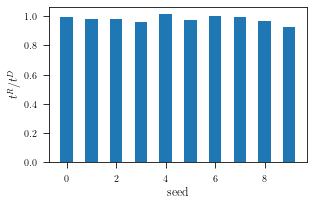

In [62]:
with plt.style.context('../IOP_large.mplstyle'):

    fig, ax = plt.subplots()

    x = np.array(range(num_samples))
    width = 0.50 # the width of the bars

    ax.bar(x,wall_time_uniform/wall_time_truncated, width)
    # ax.bar(x + width/2,wall_time_truncated, width, label=r"$\rm{Direct}$")

    # ax.legend(frameon=True,loc=(0.62,0.04))
    
    ax.set_ylabel(r"$t^{R}/t^{D}$")
    ax.set_xlabel(r"$\rm{seed}$")
    
    plt.savefig("../figures/wall_times.pdf",dpi=300)
    plt.savefig("/Users/ecasiano/Desktop/papers-truncExponSampling/figures/wall_times.pdf",dpi=300)

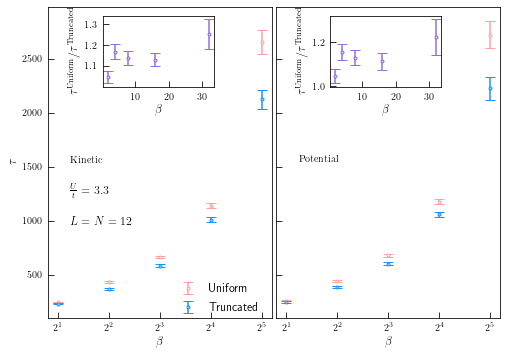

In [15]:
with plt.style.context('../IOP_large.mplstyle3'):

    # Kinetic energies subplot
    fig, ax = plt.subplots()

    ax[0].set_xscale("log",base=2)
    # ax[0].set_yscale("log",base=2)

    # plt.yscale("log",basey=2)

    ax[0].errorbar(np.range(1,num_samples)tau_kinetic_uniform,tau_kineticErr_uniform, fmt='.', 
                 capsize=5,label="Uniform",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[0].errorbar(betas_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='.', 
                 capsize=5,label="Truncated",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[0].tick_params(direction='in')
    ax[0].set_ylabel(r"$\tau$")
    ax[0].set_xlabel(r"$\beta$")
    ax[0].tick_params(direction='in')
    ax[0].annotate(r"$\rm{Kinetic}$",(0.10,0.50),xycoords="axes fraction",fontsize=10)
    ax[0].annotate(r"$\frac{U}{t} = 3.3$",(0.10,0.40),xycoords="axes fraction")
    ax[0].annotate(r"$L=N=12$",(0.10,0.30),xycoords="axes fraction")
    ax[0].legend(frameon=False,loc=(0.550,0.00))


    ax[1].errorbar(betas_uniform,tau_potential_uniform,tau_potentialErr_uniform, fmt='.', 
                 capsize=5,label="uniform",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[1].errorbar(betas_truncated,tau_potential_truncated,tau_potentialErr_truncated, fmt='.', 
                 capsize=5,label="truncated",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[1].set_xlabel(r"$\beta$")
    ax[1].tick_params(direction='in')
    ax[1].annotate(r"$\rm{Potential}$",(0.10,0.50),xycoords="axes fraction",fontsize=10)

    # Insets kinetic energy
    left,bottom,width,height = [0.220,0.687,0.19,0.19*.9]
    ax2 = fig.add_axes([left,bottom,width,height])

    f = np.abs(tau_kinetic_truncated/tau_potential_uniform)

    f = np.abs(tau_kinetic_uniform/tau_potential_truncated)

    A = tau_kinetic_uniform
    σ_A = tau_kineticErr_uniform

    B = tau_kinetic_truncated
    σ_B = tau_kineticErr_truncated

    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax2.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="Uniform",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax2.tick_params(direction='in')
    ax2.set_ylabel(r"$\tau^{\rm{Uniform}}/\tau^{\rm{Truncated}}$")
    ax2.set_xlabel(r"$\beta$")

    # Inset potential energy
    left,bottom,width,height = [0.609,0.687,0.19,0.19*.9]
    ax3 = fig.add_axes([left,bottom,width,height])

    f = np.abs(tau_potential_truncated/tau_potential_uniform)

    f = np.abs(tau_potential_uniform/tau_potential_truncated)

    A = tau_potential_uniform
    σ_A = tau_potentialErr_uniform

    B = tau_potential_truncated
    σ_B = tau_potentialErr_truncated

    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax3.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="uniform",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax3.tick_params(direction='in')
    ax3.set_ylabel(r"$\tau^{\rm{Uniform}}/\tau^{\rm{Truncated}}$")
    ax3.set_xlabel(r"$\beta$")

    plt.savefig("../figures/pigsfli_tau_vs_beta_critical.pdf",dpi=300)
    plt.savefig("/Users/ecasiano/Desktop/papers-truncExponSampling/figures/pigsfli_tau_vs_beta_critical.pdf",dpi=300)